In [1]:
from maelzel.snd import pyin
from maelzel.snd.audiosample import Sample
import bpf4
import numpy as np

Sample(dur=8.926s, sr=48000, ch=1, frames=428461)
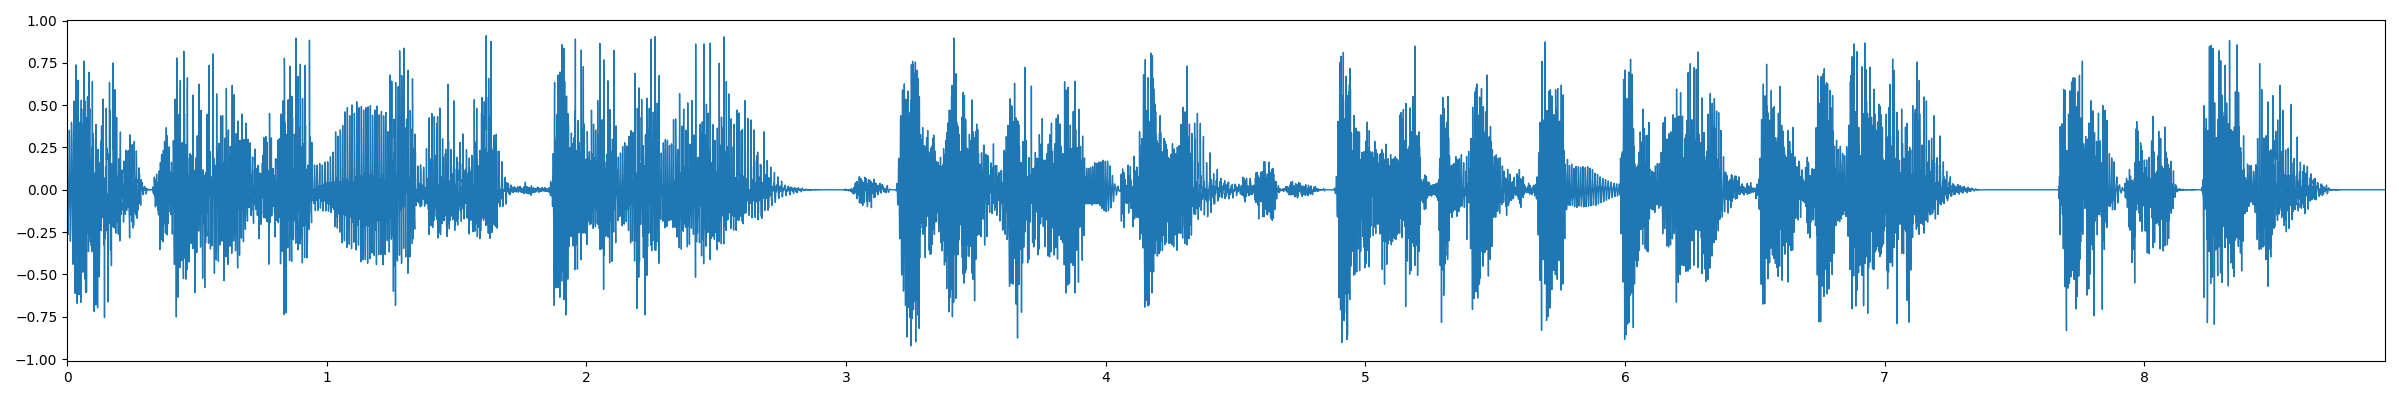

In [2]:
sample = Sample("../snd/voiceover-fragment-48k.flac")
sample

In [3]:
times, freqs, voiced = pyin.pyin(sample.samples, sr=sample.sr, minFreq=60, maxFreq=1000, voicedProb=0.5, 
                                 v2u=0.01, u2v=0.6, 
                                 hopSize=512, frameSize=2048)

NameError: name 'times' is not defined

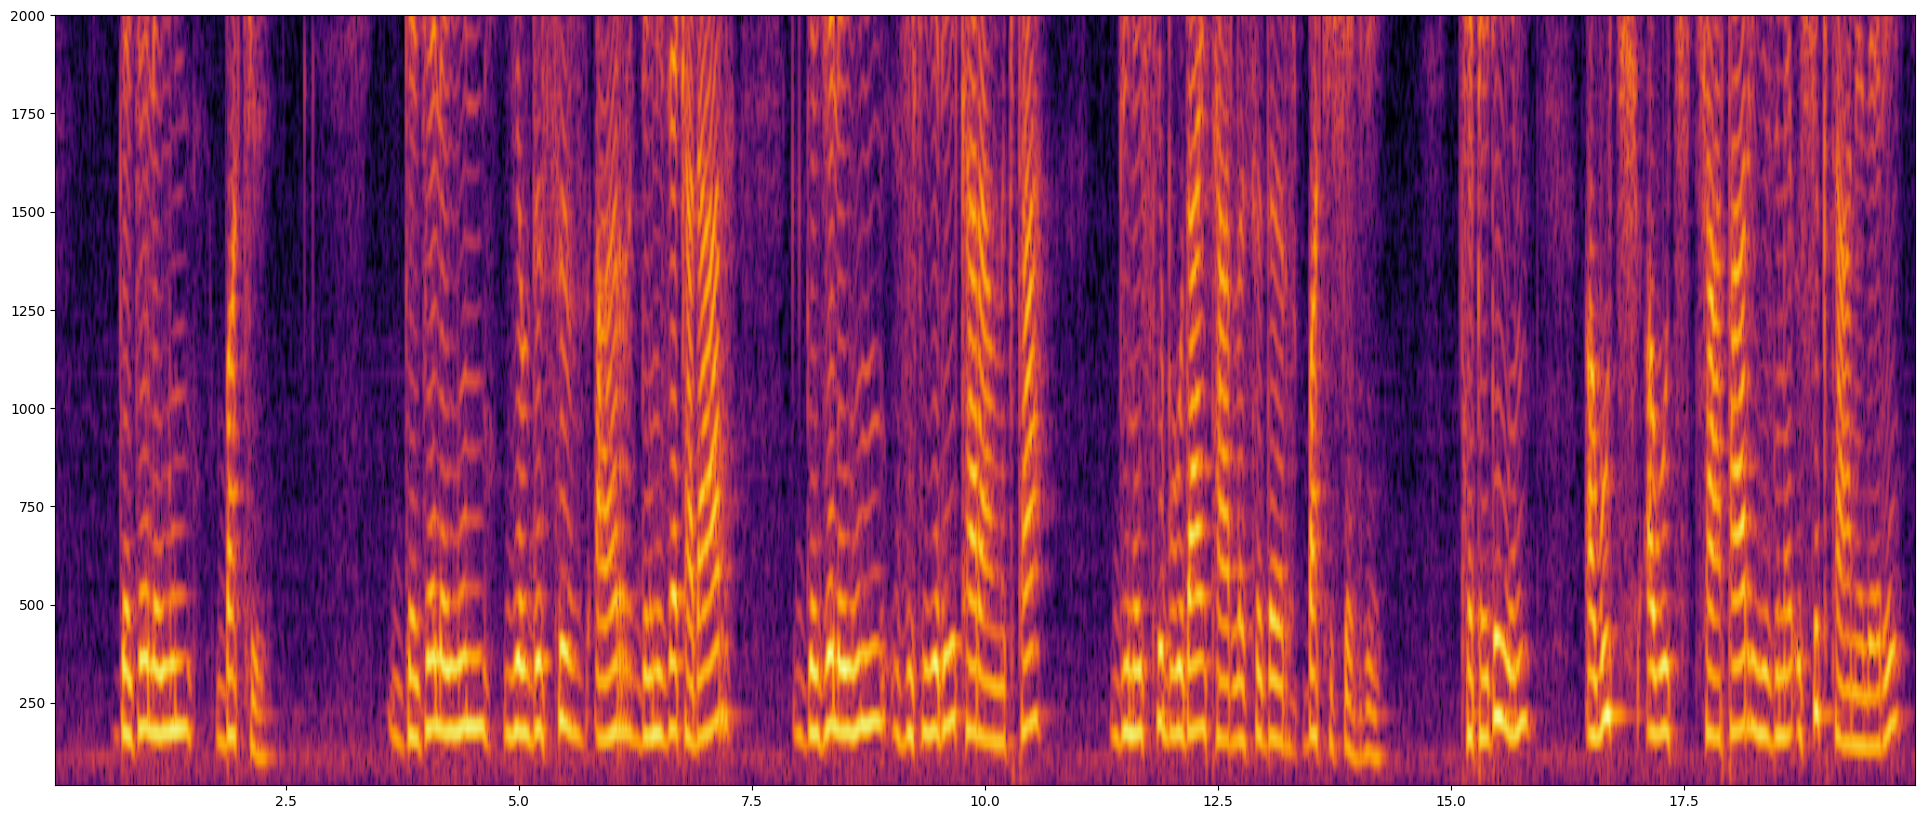

In [3]:
ax = sample.plotSpectrogram(maxfreq=2000)
ax.plot(times, freqs)

In [6]:
%prun out = pyin.pyinAnalysis(sample.samples, sr=sample.sr, v2u=0.01, u2v=0.8,peakBins=100, rolloff=0.85, minFreq=50, pitchDrift=100, peakynessMinFreq=100, peakynessMaxFreq=16000)   

         100449 function calls (100445 primitive calls) in 1.343 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.239    0.239    0.615    0.615 pyin.py:253(_viterbiDecode)
     2241    0.196    0.000    0.196    0.000 {method 'argmax' of 'numpy.ndarray' objects}
     1674    0.185    0.000    0.190    0.000 _pocketfft.py:58(_raw_fft)
     5858    0.146    0.000    0.146    0.000 {method 'reduce' of 'numpy.ufunc' objects}
      837    0.103    0.000    0.204    0.000 pyin.py:83(_spectralFlatness)
      837    0.057    0.000    0.095    0.000 pyin.py:125(_cmndf)
        1    0.044    0.044    1.189    1.189 pyin.py:648(pyinAnalysis)
     1674    0.039    0.000    0.039    0.000 {method 'cumsum' of 'numpy.ndarray' objects}
      837    0.033    0.000    0.141    0.000 pyin.py:101(_fftDiff)
     1674    0.023    0.000    0.069    0.000 _methods.py:115(_mean)
      837    0.023    0.000    0.023    0.000 {method '

In [4]:
rmsbpf = sample.rmsBpf(overlap=2)

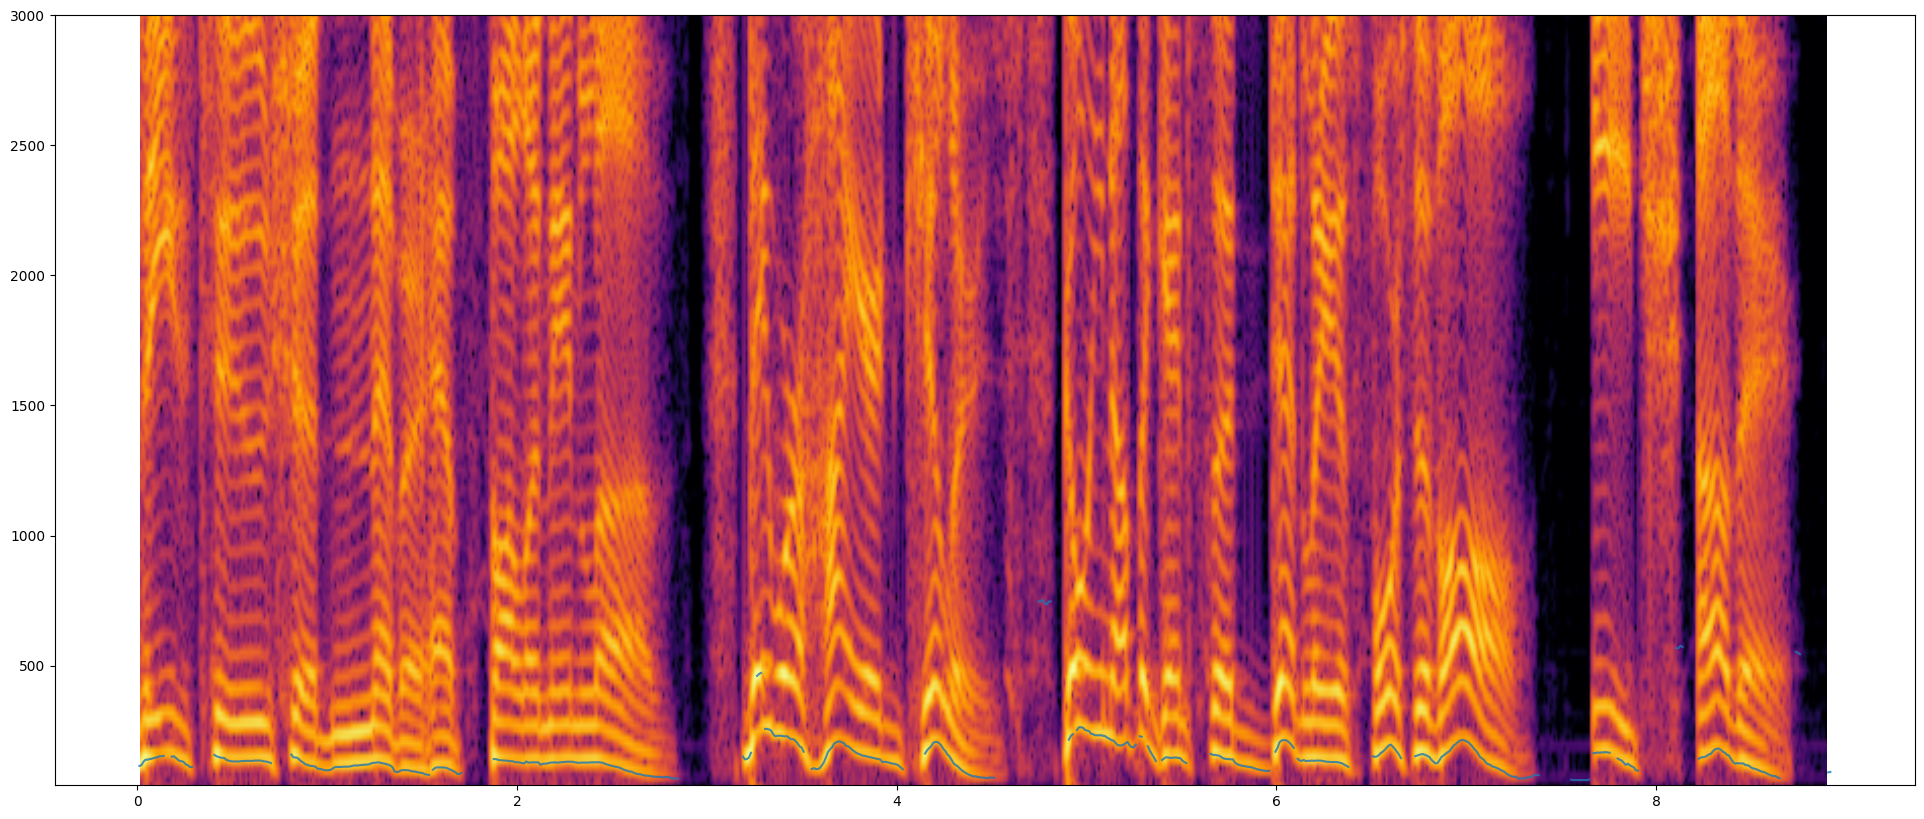

In [5]:
# : L = 20 × log (voltage ratio V2 / V1)
ax = sample.plotSpectrogram(maxfreq=3000)
peakyness = out['peakyness'] ** 3
# silence = rmsbpf.map(out['times']) < 0.01
# ax.plot(out['times'], out['peakyness']**3*2000)
# ax.plot(out['times'], out['rolloff'], alpha=0.9)
# ax.plot(out['times'], peakyness*2000, alpha=0.9)
# ax.plot(out['times'], noisy*2000, alpha=0.9)

# ax.plot(out['times'], silence*2000)
#ax.plot(out['times'], out['flatness'] * 2000)
ax.plot(out['times'], out['f0'], alpha=0.8)



In [21]:
sample.sr

48000

In [10]:
freqs = np.fft.rfftfreq(2048, 1/sample.sr)

In [14]:
np.argmax(freqs > 160)

np.int64(8)

In [18]:
10**10

10000000000

In [38]:
10 ** 4

10000

In [34]:
10**(2)

100

In [18]:
2**2

4